In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Homestays_Data(in).csv")

# Task 1

In [7]:
#dropping rows with log_price 0
df = df[df['log_price'] != 0]
df

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee city  \
0            1.0  Real Bed              strict          True  NYC   
1            1.0  Real Bed              strict          True  NYC   
2            1.0  Real Bed            moderate          True  NYC   
3            1.0  Real Bed            flexible          True   SF   
4            1.0  Real Bed            moderate          True   DC   
...          ...       ...                 ...           ...  ...   
74106        1.0  Real Bed            flexible         False  NYC   
74107        2.0  Real Bed            moderate          True   LA   
74108        1.0  Real Bed            moderate          True  NYC   
74109        1.0  Real Bed              strict          True  NYC   
74110        1.0  Real Bed            moderate         False   LA   

                                             description first_review  \
0      Beautiful, sunlit brownstone 1-bedroom in the ...    6/18/2016   
1      Enjoy travelling during your stay in Manhattan...     8/5/2017   
2      The Oasis comes complete with a full backyard ...    4/30/2017   
3      This light-filled home-away-from-home is super...          NaN   
4      Cool, cozy, and comfortable studio located in ...    5/12/2015   
...                                                  ...          ...   
74106                          one room in bushwick apt           NaN   
74107  Located on the Pacific Coast Highway, this apa...    8/15/2016   
74108  A modern apartment located in East Williamsbur...     1/3/2015   
74109  Fully renovated, designer's studio located in ...          NaN   
74110  You will stay-aboard the Island Trader at one ...     9/5/2013   

      host_has_profile_pic host_identity_verified host_response_rate  \
0                        t                      t                NaN   
1                        t                      f               100%   
2                        t                      t               100%   
3                        t                      t                NaN   
4                        t                      t               100%   
...                    ...                    ...                ...   
74106                    t                      t                NaN   
74107                    t                      f               100%   
74108                    t           

In [8]:
#converting to datetime
df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])

current_date = datetime.now()
df['Host_Tenure'] = (current_date - df['host_since']).dt.days / 365
#calculating the years

# calculating Days_Since_Last_Review
df['Days_Since_Last_Review'] = (current_date - df['last_review']).dt.days

#handling improper formatting of amenities
df['Amenities_new'] = df['amenities'].apply(lambda x: [amenity.strip('"') for amenity in str(x).strip('{}').split(',')])

# creating Amenities_Count
df['Amenities_Count'] = df['Amenities_new'].apply(lambda x: len(x))

df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  \
0  Real Bed              strict          True  NYC   
1  Real Bed              strict          True  NYC   
2  Real Bed            moderate          True  NYC   
3  Real Bed            flexible          True   SF   
4  Real Bed            moderate          True   DC   

                                         description first_review  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...    6/18/2016   
1  Enjoy travelling during your stay in Manhattan...     8/5/2017   
2  The Oasis comes complete with a full backyard ...    4/30/2017   
3  This light-filled home-away-from-home is super...          NaN   
4  Cool, cozy, and comfortable studio located in ...    5/12/2015   

  host_has_profile_pic host_identity_verified host_response_rate host_since  \
0                    t                      t                NaN 2012-03-26   
1                    t                      f               100% 2017-06-19   
2                    t                      t               100% 2016-10-25   
3                    t                      t                NaN 2015-04-19   
4                    t                      t               100% 2015-03-01   

  instant_bookable last_review   latitude   longitude  \
0                f  2016-07-18  40.696524  -73.991617   
1                t  2017-09-23  40.766115  -73.989040   
2                t  2017-09-14  40.808110  -73.943756   
3                f         NaT  37.772004 -122.431619   
4                t  2017-01-22  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews  review_scores_rating  \
0                  2                 100.0   
1                  6                  93.0   
2                 10                  92.0   
3                  0                   NaN   
4                  4                  40.0   

                                       thumbnail_url zipcode  bedrooms  beds  \
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201       1.0   1.0   
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019       3.0   3.0   
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027       1.0   3.0   
3  https://a0.muscache.com/im/pictures/72208dad-9...   94117       2.0   2.0   
4                                                NaN   20009       0.0   1.0   

   Host_Tenure  Days_Since_Last_Review  \
0    12.117808                  2848.0   
1     6.882192                  2416.0   
2     7.531507                  2425.0   
3     9.052055                     NaN   
4     9.186301                  2660.0   

                                       Amenities_new  Amenities_Count  
0  [Wireless Internet, Air conditioning, Kitchen,...                9  
1  [Wireless Internet, Air conditioning, Kitchen,...               15  
2  

# Task 2

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
column_names = [
    "room_type_Entire home/apt", "room_type_Private room", "room_type_Shared room",
    "property_type_Apartment", "property_type_Bed & Breakfast", "property_type_Boat",
    "property_type_Boutique hotel", "property_type_Bungalow", "property_type_Cabin",
    "property_type_Camper/RV", "property_type_Casa particular", "property_type_Castle",
    "property_type_Cave", "property_type_Chalet", "property_type_Condominium",
    "property_type_Dorm", "property_type_Earth House", "property_type_Guest suite",
    "property_type_Guesthouse", "property_type_Hostel", "property_type_House",
    "property_type_Hut", "property_type_In-law", "property_type_Island",
    "property_type_Lighthouse", "property_type_Loft", "property_type_Other",
    "property_type_Parking Space", "property_type_Serviced apartment", "property_type_Tent",
    "property_type_Timeshare", "property_type_Tipi", "property_type_Townhouse",
    "property_type_Train", "property_type_Treehouse", "property_type_Vacation home",
    "property_type_Villa", "property_type_Yurt", "bed_type_Airbed", "bed_type_Couch",
    "bed_type_Futon", "bed_type_Pull-out Sofa", "bed_type_Real Bed",'log_price'
]

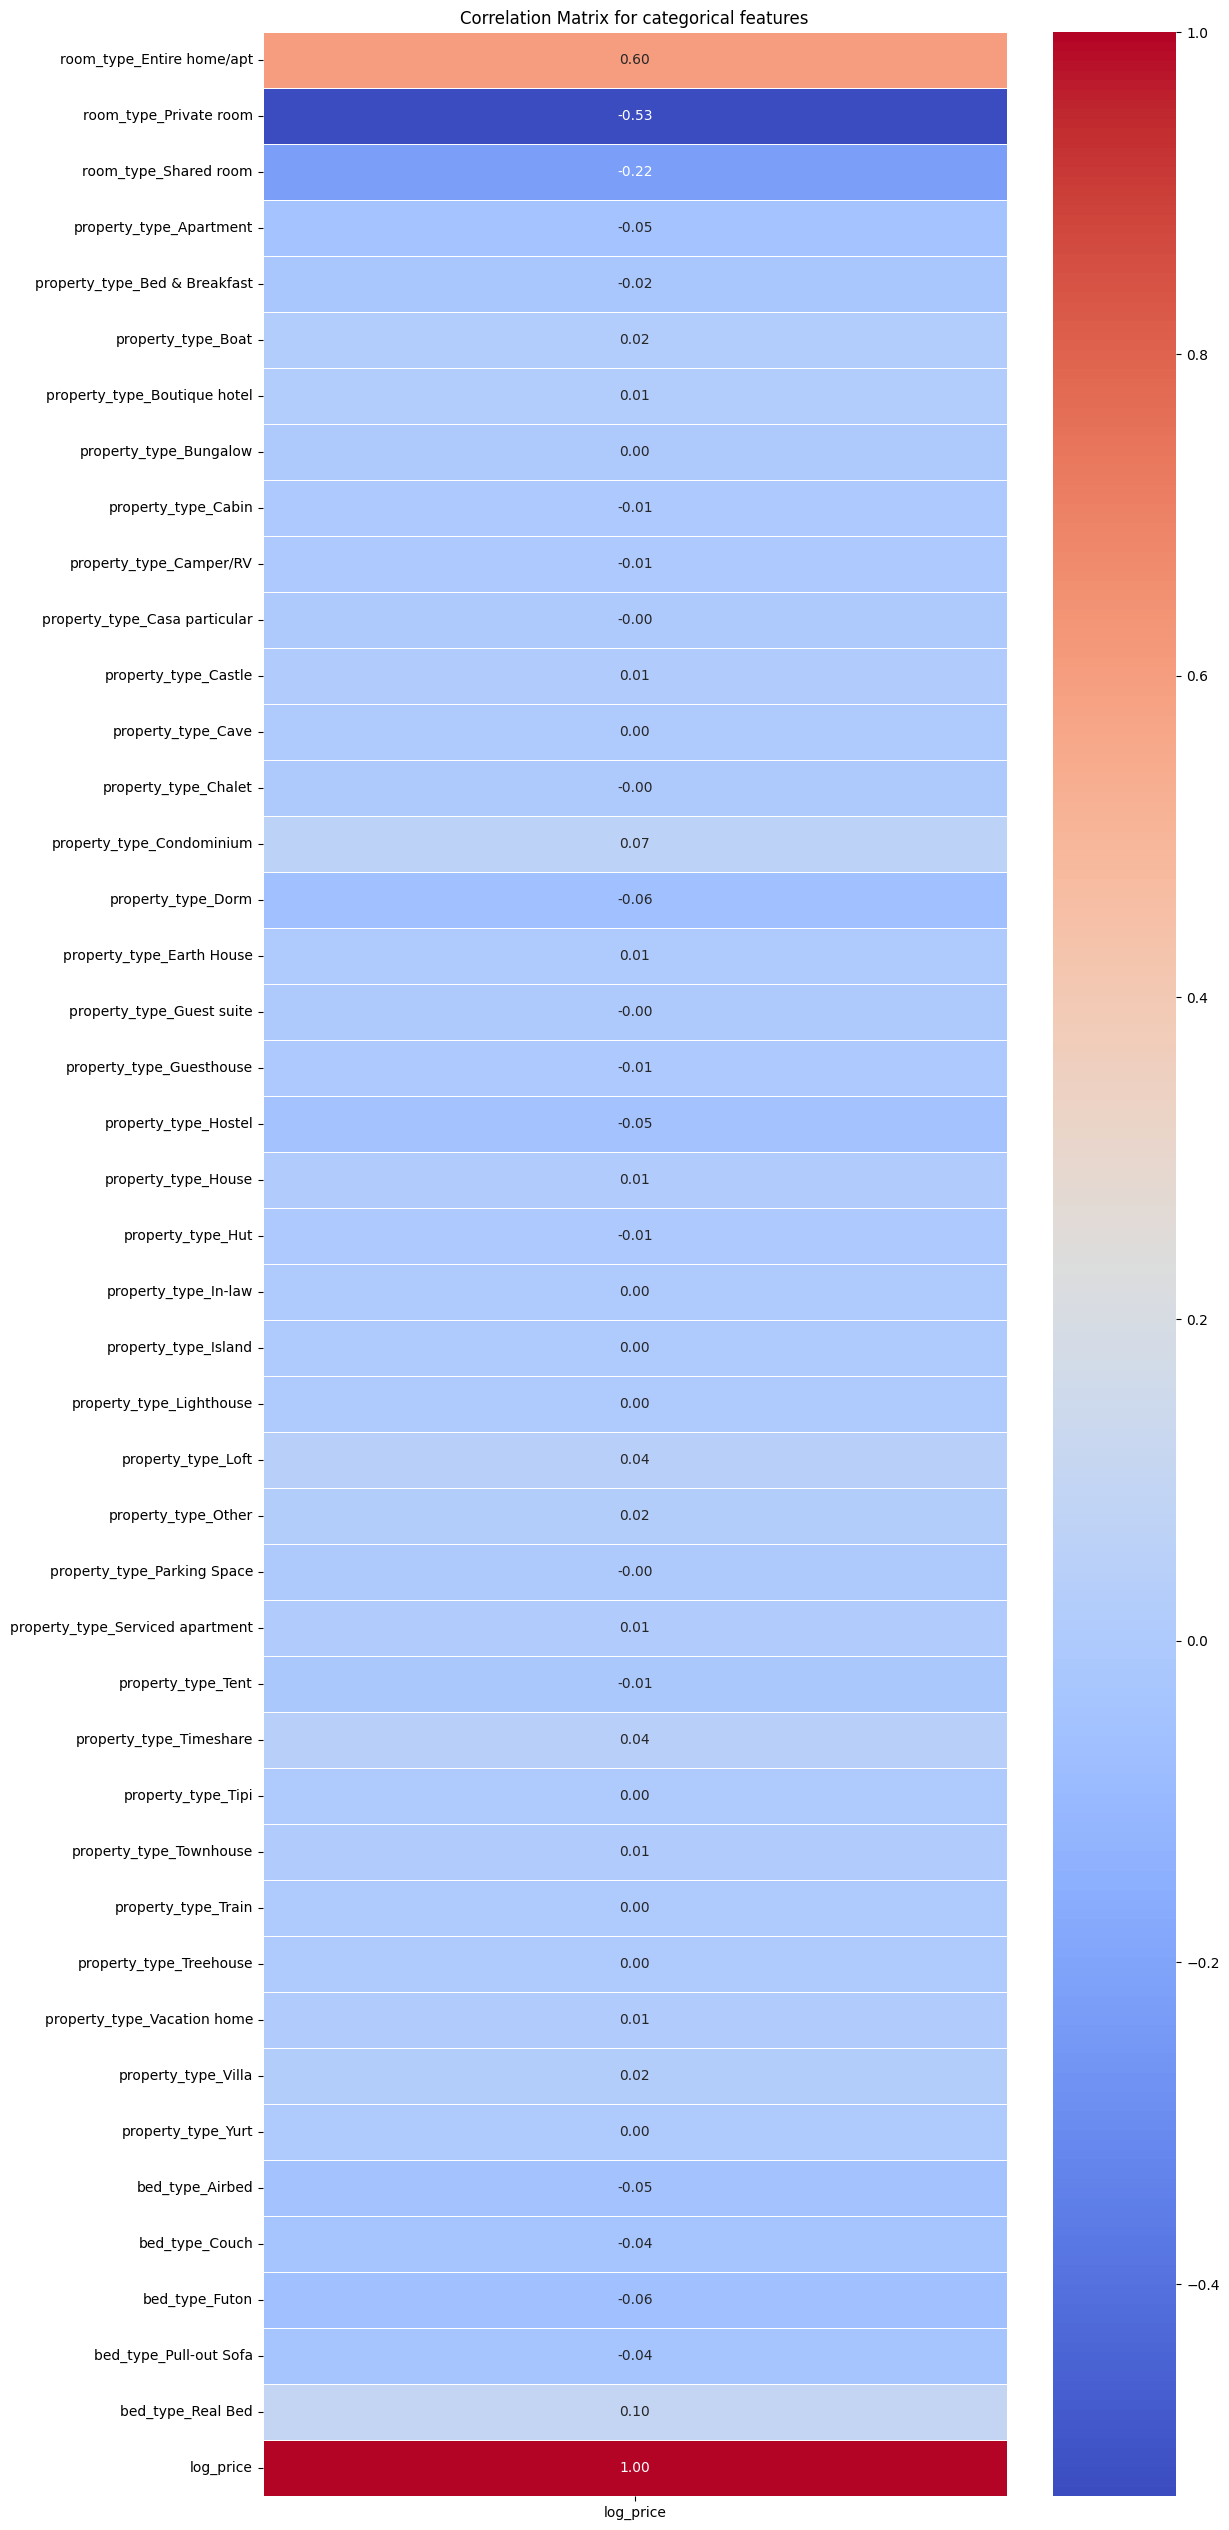

In [ ]:
correlation_matrix = df[column_names].corr()
#plotting the corr matrix for the categorical features (one hot encoded)

plt.figure(figsize=(12, 8*4))
sns.heatmap(correlation_matrix[['log_price']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for categorical features')
plt.show()

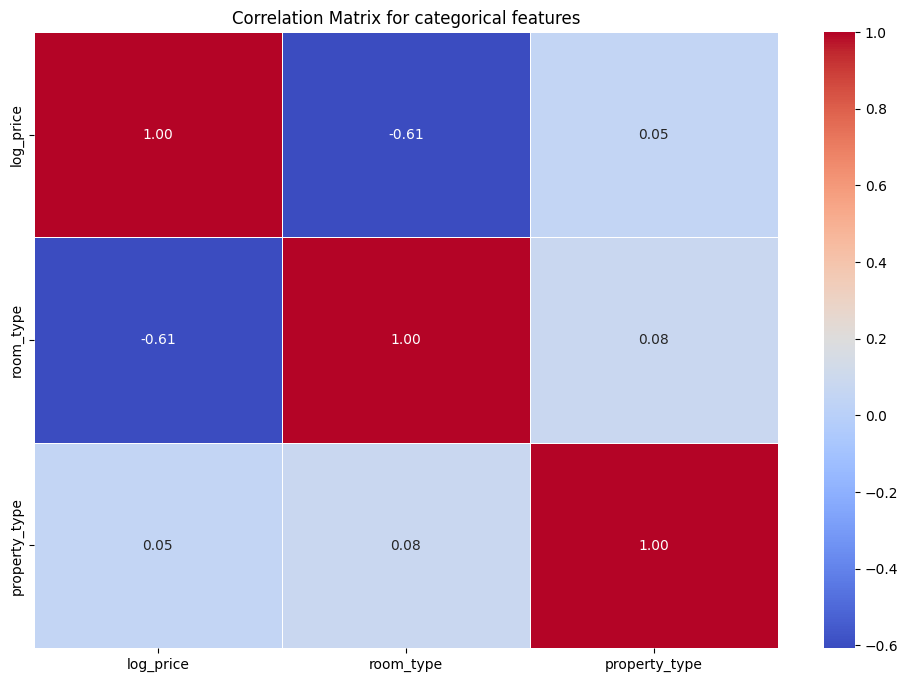

In [ ]:
correlation_matrix = df[['log_price','room_type','property_type']].corr()
#plotting the corr matrix for the categorical features (label encoded)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for categorical features')
plt.show()

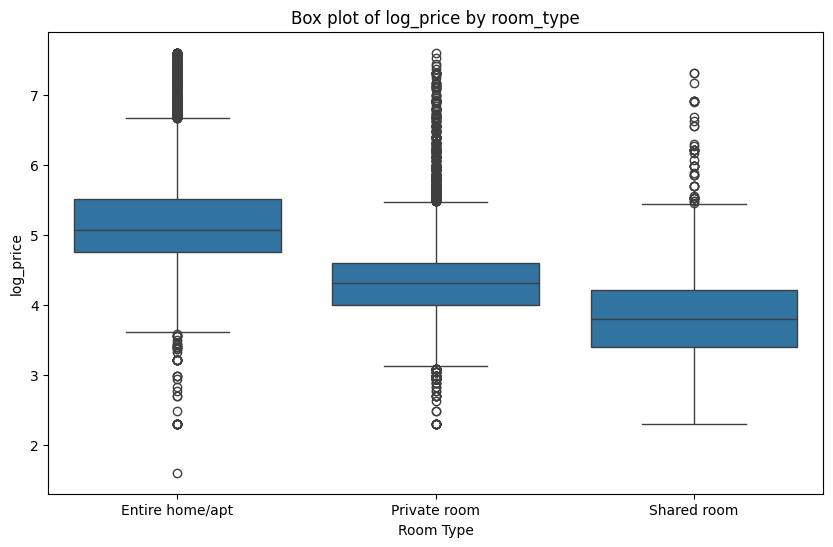

In [31]:
# avg price per room type
room_type_avg_price = df.groupby('room_type')['log_price'].mean().reset_index()

# Box plot for room type vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='log_price', data=df)
plt.title('Box plot of log_price by room_type')
plt.xlabel('Room Type')
plt.ylabel('log_price')
plt.show()

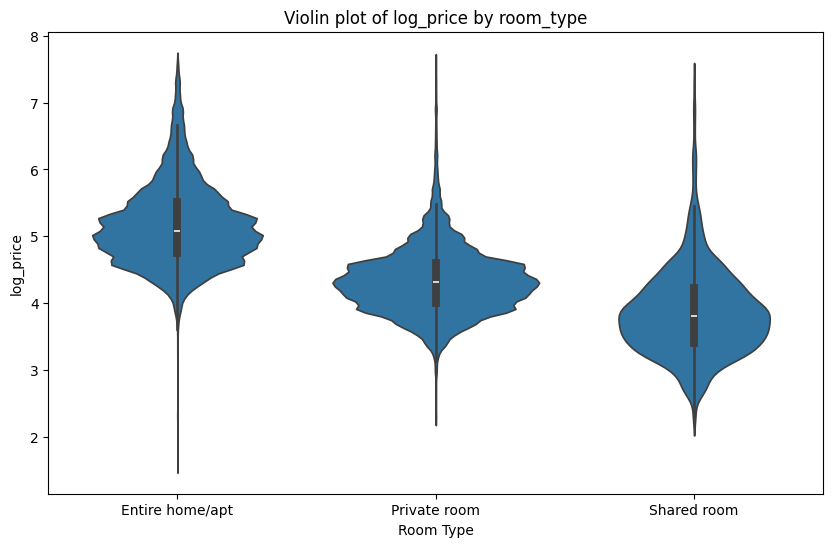

In [32]:
# Violion plots for room type vs price
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='log_price', data=df)
plt.title('Violin plot of log_price by room_type')
plt.xlabel('Room Type')
plt.ylabel('log_price')
plt.show()

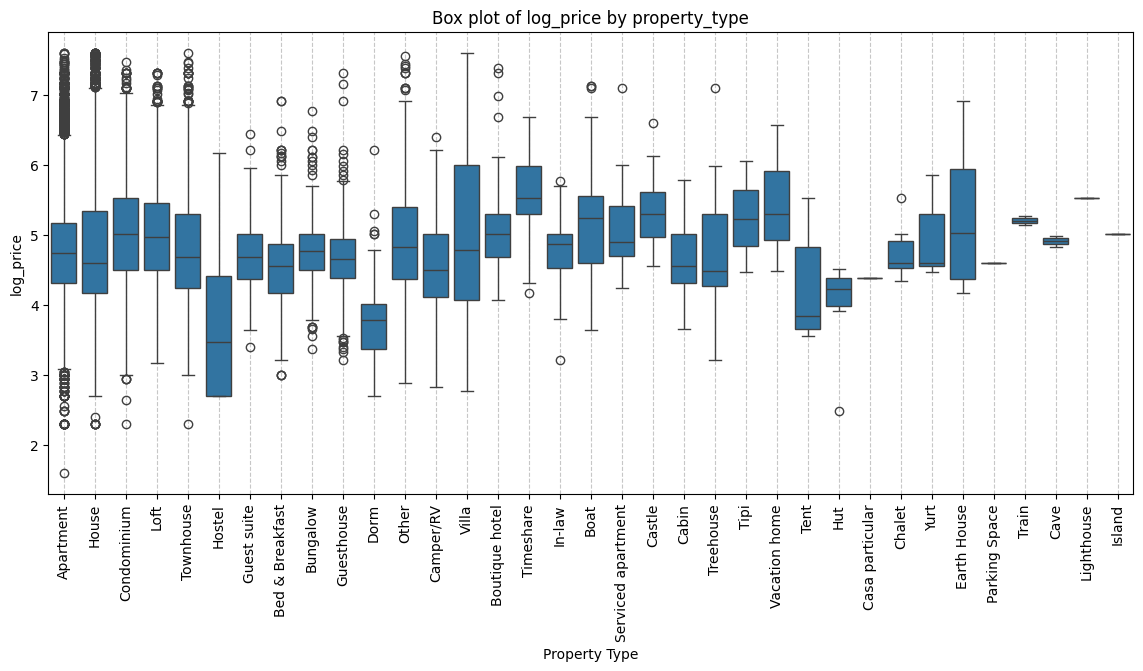

In [33]:
# Average log_price by property_type
property_type_avg_price = df.groupby('property_type')['log_price'].mean().reset_index()

# Box plot for property_type vs log_price
plt.figure(figsize=(14, 6))
sns.boxplot(x='property_type', y='log_price', data=df)
plt.title('Box plot of log_price by property_type')
plt.xlabel('Property Type')
plt.ylabel('log_price')
plt.xticks(rotation=90)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

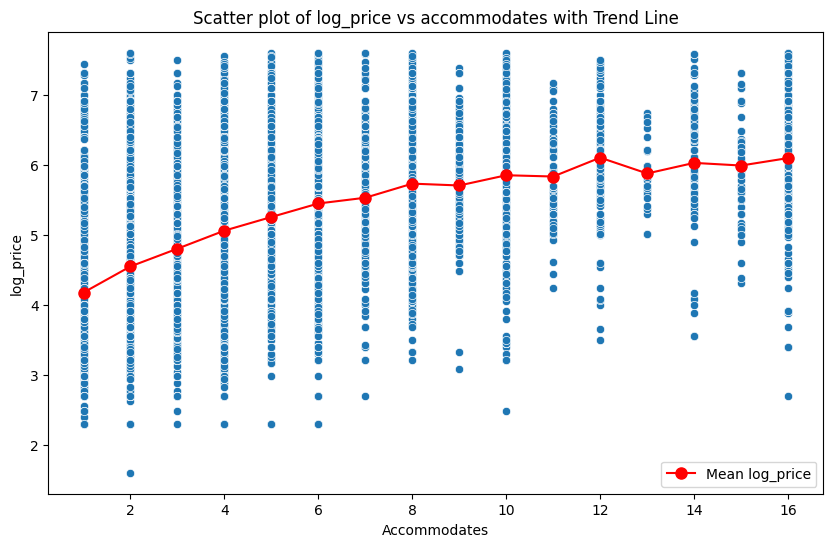

In [34]:
# Calculate mean log_price for each value of accommodates
mean_log_price = df.groupby('accommodates')['log_price'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='accommodates', y='log_price', data=df)
plt.plot(mean_log_price.index, mean_log_price.values, color='red', linestyle='-', marker='o', markersize=8, label='Mean log_price')
plt.title('Scatter plot of log_price vs accommodates with Trend Line')
plt.xlabel('Accommodates')
plt.ylabel('log_price')
plt.legend()
plt.show()

An upward trend in price is visible with an increase in accomodates as expected

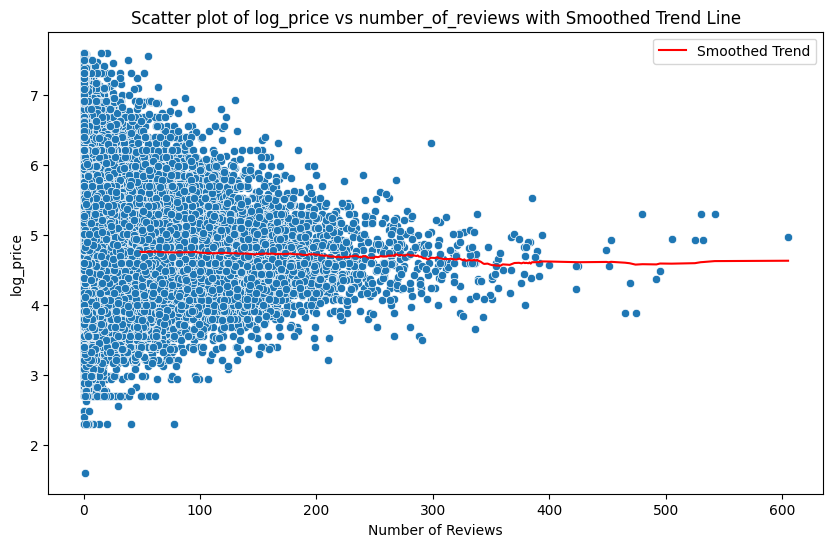

In [35]:
#calculating the rolling mean of log_price to smoothen the trend line
rolling_mean_log_price = df.groupby('number_of_reviews')['log_price'].mean().rolling(window=50).mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='log_price', data=df)
plt.plot(rolling_mean_log_price.index, rolling_mean_log_price.values, color='red', linestyle='-', label='Smoothed Trend')
plt.title('Scatter plot of log_price vs number_of_reviews with Smoothed Trend Line')
plt.xlabel('Number of Reviews')
plt.ylabel('log_price')
plt.legend()
plt.show()

price seems to have to no change with no. of reviews

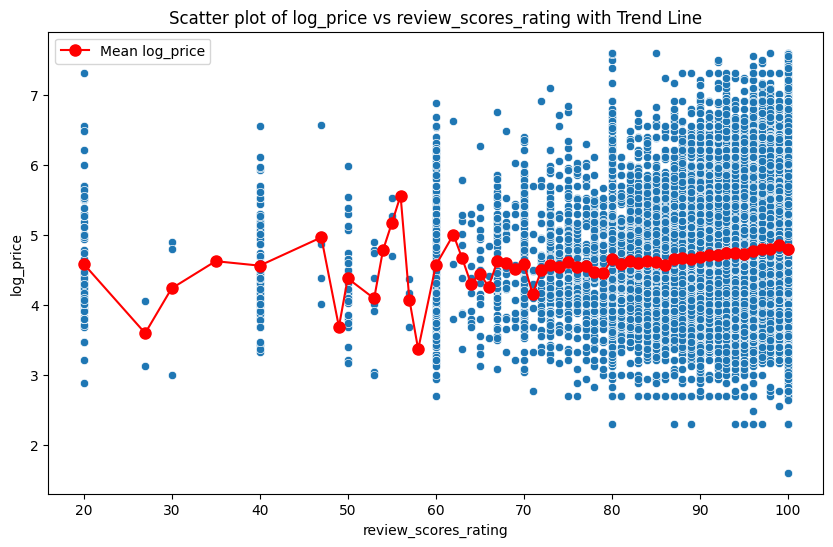

In [36]:
# Calculate mean log_price for each value of review_scores_rating
mean_log_price = df.groupby('review_scores_rating')['log_price'].mean().rolling(window=1).mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='log_price', data=df)
plt.plot(mean_log_price.index, mean_log_price.values, color='red', linestyle='-', marker='o', markersize=8, label='Mean log_price')
plt.title('Scatter plot of log_price vs review_scores_rating with Trend Line')
plt.xlabel('review_scores_rating')
plt.ylabel('log_price')
plt.legend()
plt.show()

as for the review scores itself, there seems to be a "very slight" increase in price as the score increase from 80 and above

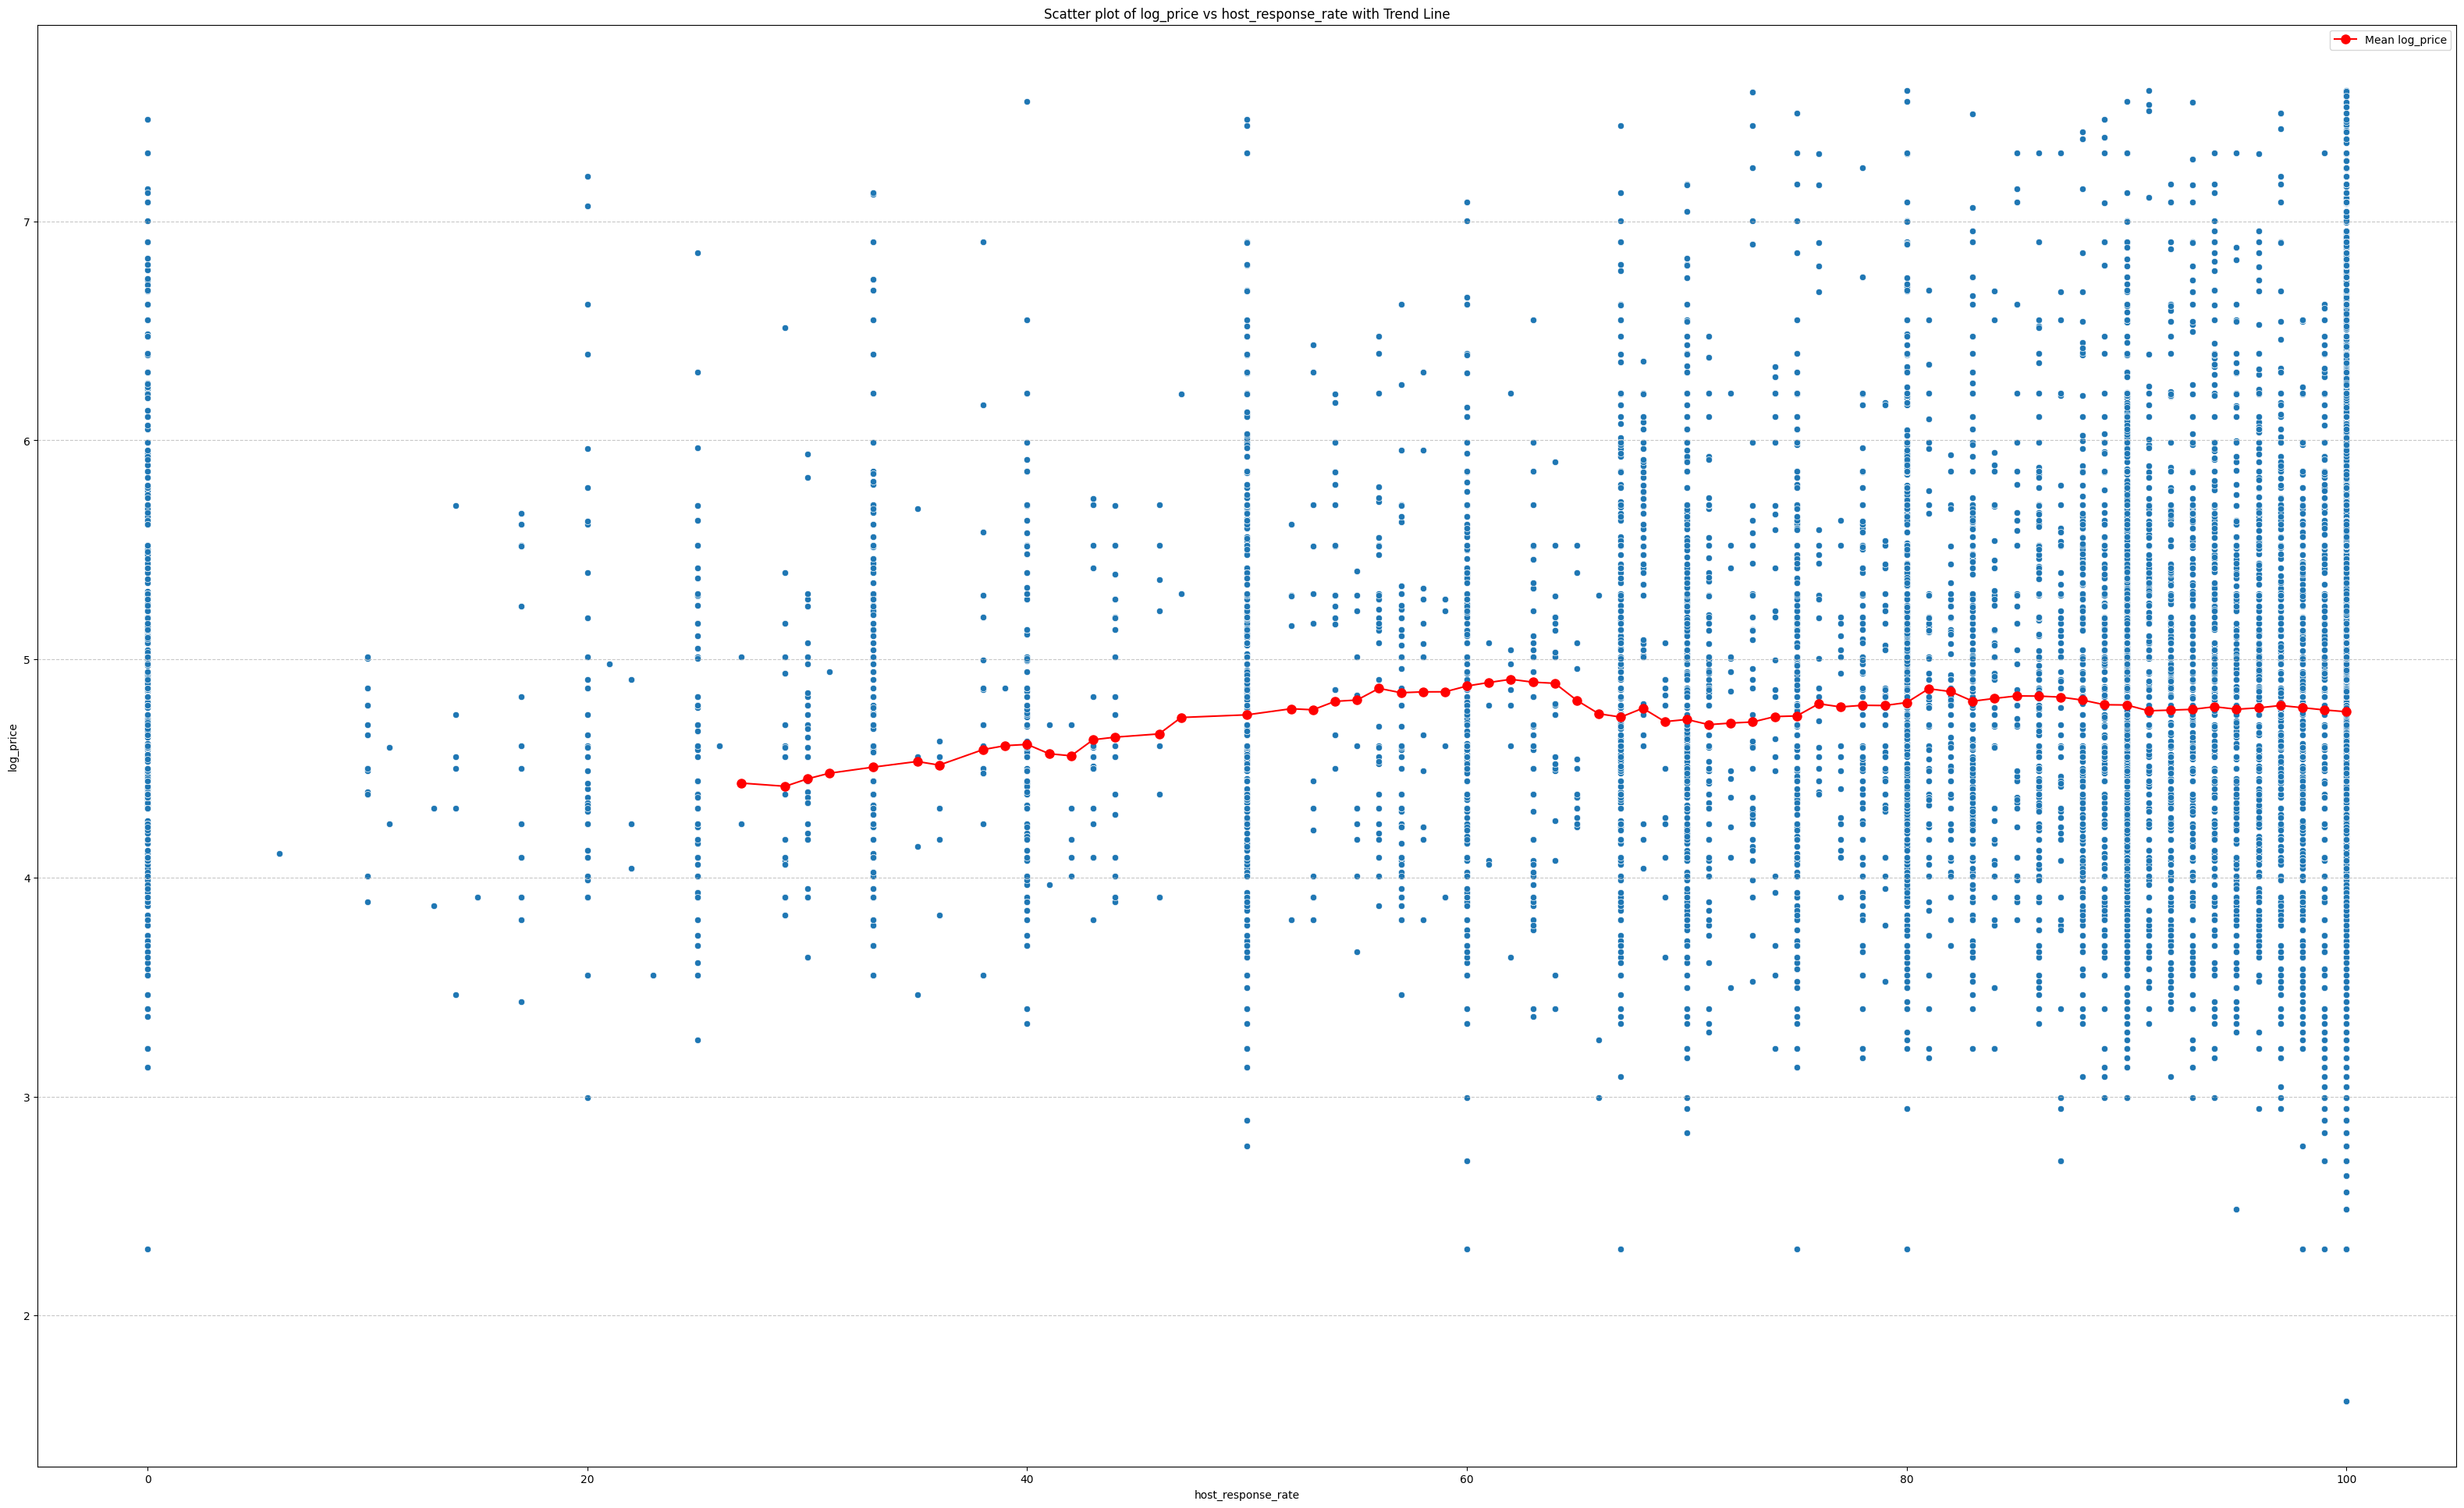

In [38]:
# df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
# converting the percentages to floats

#calculating mean log_price for each value of host_response_rate
#also performing a smoothing operation
mean_log_price = df.groupby('host_response_rate')['log_price'].mean().rolling(window=15).mean()

plt.figure(figsize=(40,24))
sns.scatterplot(x='host_response_rate', y='log_price', data=df)
plt.plot(mean_log_price.index, mean_log_price.values, color='red', linestyle='-', marker='o', markersize=8, label='Mean log_price')
plt.title('Scatter plot of log_price vs host_response_rate with Trend Line')
plt.xlabel('host_response_rate')
plt.ylabel('log_price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

a noticeable upward trend in price for the host response rate as response rate increases upto ~60%

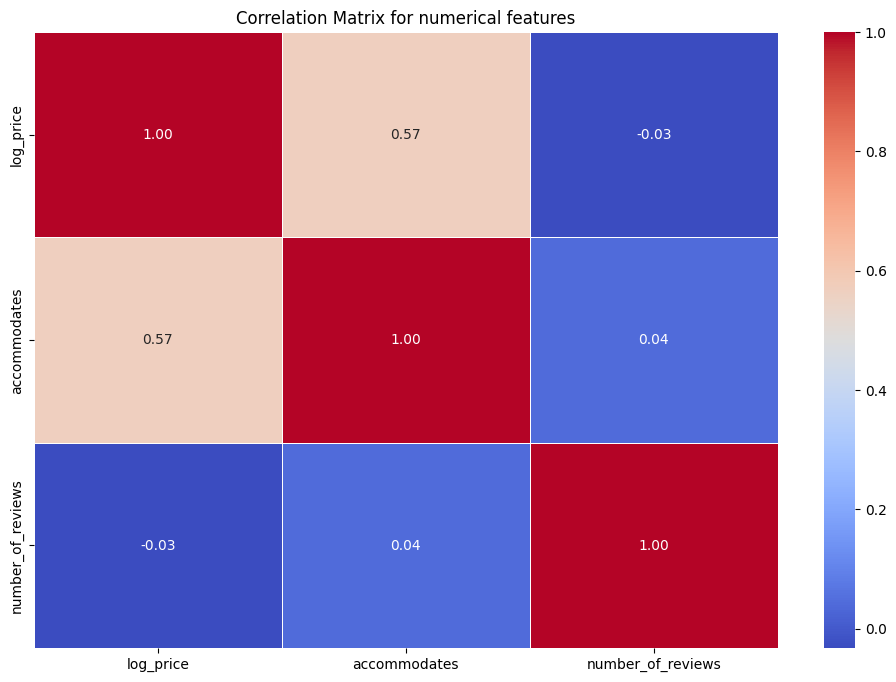

In [ ]:
correlation_matrix = df[['log_price','accommodates','number_of_reviews']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for numerical features')
plt.show()

a positive correlation of price with accomodates, as expected, but a near 0 correlation for the no of reviews features

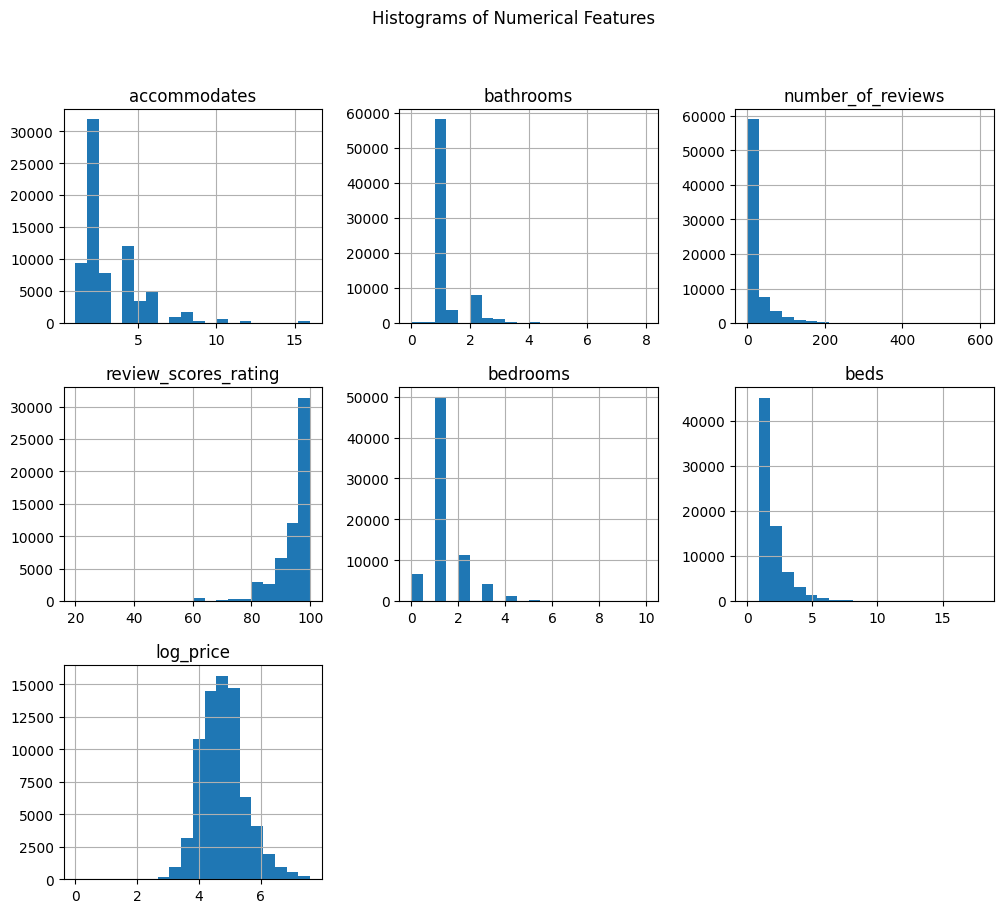

In [ ]:
# histograms for distribution of numerical features
numerical_features = ['accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'log_price']
df[numerical_features].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Task 3

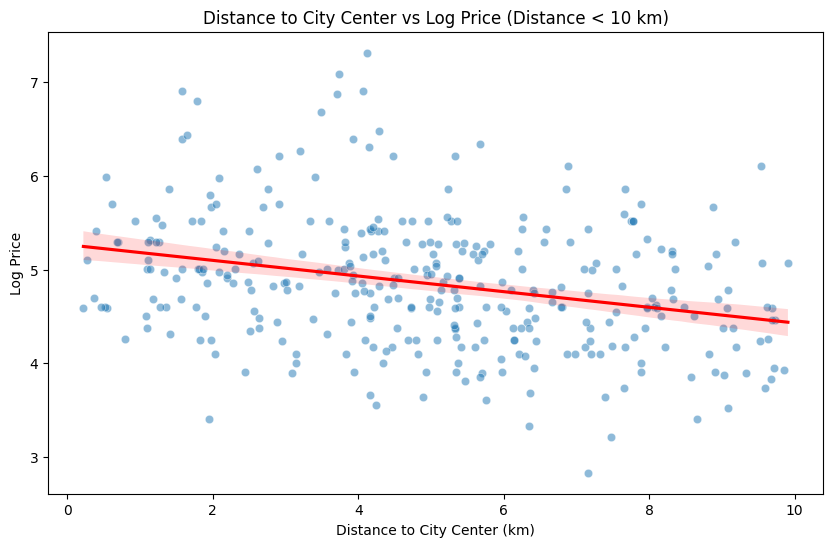

Correlation between distance to city center and log_price (Filtered Data): -0.29342971532679446


In [ ]:
from geopy.distance import great_circle

#defining the city centers coordinates
#found the coordinates manually from google
city_centers = {
    'NYC': (40.7128, -74.0060),
    'SF': (37.7879, -122.4075),
    'DC': (38.9005, -77.0257),
    'LA': (34.12448, -118.40778),
    'Chicago': (41.88168, -87.62660),
    'Boston': (42.361145, -71.057083)
}

homestays_data = df

#calculating distance to city center for each listing
homestays_data['distance_to_center'] = homestays_data.apply(lambda row: great_circle((row['latitude'], row['longitude']), city_centers[row['city']]).kilometers, axis=1)
df['distance_to_center'] = homestays_data['distance_to_center']

#sampling due to too many datapoints
sampled_data = homestays_data.sample(n=500)

#filtering only those points with distance to city center < 10km, for better visualisation of the relation with price
filtered_data = sampled_data[sampled_data['distance_to_center'] < 10]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_center', y='log_price', data=filtered_data, alpha=0.5)

#simple linear regression model line
sns.regplot(x='distance_to_center', y='log_price', data=filtered_data, scatter=False, color='red')
plt.title('Distance to City Center vs Log Price (Distance < 10 km)')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Log Price')
plt.show()

# Calculate correlation between distance to city center and log_price for the filtered data
correlation_filtered = filtered_data['distance_to_center'].corr(filtered_data['log_price'])
print("Correlation between distance to city center and log_price (Filtered Data):", correlation_filtered)

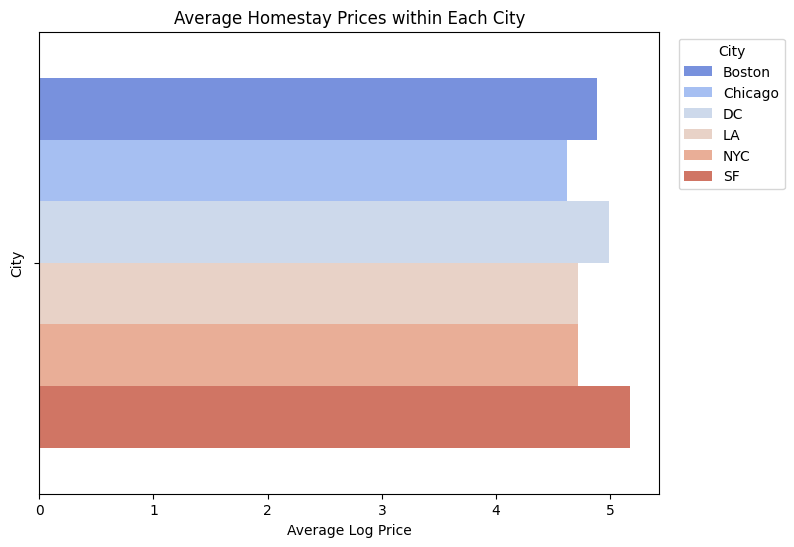

In [ ]:
#calculating average price grouped by city
city_prices = homestays_data.groupby(['city'])['log_price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='log_price', hue='city', data=city_prices, palette='coolwarm')
plt.title('Average Homestay Prices within Each City')
plt.xlabel('Average Log Price')
plt.ylabel('City')
plt.legend(title='City', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

In [3]:
import folium
from folium.plugins import HeatMap

In [14]:
# Create a map centered at the mean latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)


# Create a heat map to visualize price distribution
m_heatmap = folium.Map(location=map_center, zoom_start=10)
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m_heatmap)

m_heatmap

# Task 4

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#converting to lowercase
df['description'] = df['description'].str.lower()

sid = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores['neg'], scores['neu'], scores['pos']

#add sentiment scores
df['neg_score'], df['neu_score'], df['pos_score'] = zip(*df['description'].apply(get_sentiment_scores))

In [ ]:
from textblob import TextBlob

def get_sentiment_scores(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment_score'] = df['description'].apply(get_sentiment_scores)

Tested out VADER and TextBlob both to avoid weaknessess from using a single tool for SA

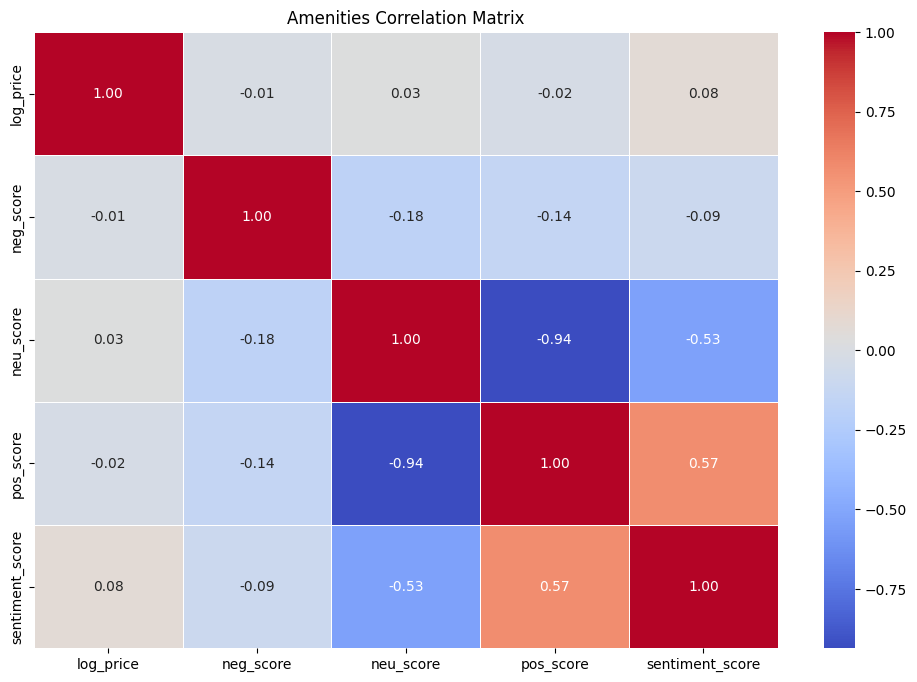

In [ ]:
description_sentiment_correlation_matrix = df[['log_price','neg_score','neu_score','pos_score','sentiment_score']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(description_sentiment_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Amenities Correlation Matrix')
plt.show()

Sentiment analysis on the description is a flawed approach due to the descriptions being neutral sounding in nature.<br>
Descriptions often mention nearby places that are unique, count/description of the listing.<br>
Sentiment analysis would be more suitable for actual user reviews.<br>
Though the descriptions can be utilised with LLMs to obtain relevant info. (as an example I tried writing prompts with GPT to rate the listings based on it's description, this provided accurate scores in my opinion)

In [ ]:
df[['description','neg_score','neu_score','pos_score','sentiment_score']]

description  neg_score  \
0      beautiful, sunlit brownstone 1-bedroom in the ...      0.048   
1      enjoy travelling during your stay in manhattan...      0.013   
2      the oasis comes complete with a full backyard ...      0.060   
3      this light-filled home-away-from-home is super...      0.088   
4      cool, cozy, and comfortable studio located in ...      0.000   
...                                                  ...        ...   
74106                          one room in bushwick apt       0.000   
74107  located on the pacific coast highway, this apa...      0.041   
74108  a modern apartment located in east williamsbur...      0.000   
74109  fully renovated, designer's studio located in ...      0.000   
74110  you will stay-aboard the island trader at one ...      0.000   

       neu_score  pos_score  sentiment_score  
0          0.684      0.268         0.716667  
1          0.823      0.164         0.250000  
2          0.819      0.120         0.274085  
3          0.734      0.178         0.281515  
4          0.869      0.131         0.196795  
...          ...        ...              ...  
74106      1.000      0.000         0.600000  
74107      0.788      0.171         0.174256  
74108      0.952      0.048         0.229167  
74109      0.896      0.104         0.320370  
74110      0.921      0.079         0.140986  

[74110 rows x 5 columns]

# Task 5

In [ ]:
#creating a set with all amenities
all_amenities = set()
for amenities_list in df['Amenities_new']:
    amenities = amenities_list
    all_amenities.update(amenities)

oh_df = pd.DataFrame()

#adding price column for correlation
oh_df['log_price'] = df['log_price']

#creating the one hot encoded column for all amenities
for amenity in all_amenities:
    oh_df[amenity] = df['Amenities_new'].apply(lambda x: 1 if amenity in x else 0)

<ipython-input-12-9adb36945d3e>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  oh_df[amenity] = df['Amenities_new'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-12-9adb36945d3e>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  oh_df[amenity] = df['Amenities_new'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-12-9adb36945d3e>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

In [ ]:
from scipy.stats import ttest_ind
#correlation analysis

#correlation with price
amenity_correlation = oh_df[[col for col in oh_df.columns if col != 'Amenities_new']].corrwith(oh_df['log_price']).sort_values(ascending=False)

#correlation of every column with every other feature
amenities_correlation_matrix = oh_df.corr()

#statistical tests, calculation t statistic  and p value
amenities_stats = {}
for amenity in all_amenities:
    has_amenity = oh_df[oh_df[amenity] == 1]['log_price']
    no_amenity = oh_df[oh_df[amenity] == 0]['log_price']
    t_stat, p_value = ttest_ind(has_amenity, no_amenity)
    amenities_stats[amenity] = {'t_statistic': t_stat, 'p_value': p_value}

#sort amenities_stats by p-value
amenities_stats_sorted = sorted(amenities_stats.items(), key=lambda x: x[1]['p_value'])

print("Top 10 amenities positively correlated with log_price:")
for amenity, correlation in amenity_correlation.head(10).items():
    print(f"{amenity}: {correlation}")

print("\nTop 10 amenities negatively correlated with log_price:")
for amenity, correlation in amenity_correlation.tail(10).items():
    print(f"{amenity}: {correlation}")

print("\nTop 10 amenities with lowest p-values from statistical tests:")
for amenity, stats in amenities_stats_sorted[:10]:
    print(f"{amenity}: t_statistic={stats['t_statistic']}, p_value={stats['p_value']}")


Top 10 amenities positively correlated with log_price:
log_price: 1.0
Family/kid friendly: 0.29045401174428825
TV: 0.2638775426428885
Cable TV: 0.23768927227780628
Dryer: 0.17163046028690845
Indoor fireplace: 0.17086540801675296
Washer: 0.16531961667416814
Doorman: 0.12043716733979491
Hair dryer: 0.11745530949324512
Suitable for events: 0.1156809957476397

Top 10 amenities negatively correlated with log_price:
Free parking on street: -0.019801736561911608
Host greets you: -0.0332787783438981
Dog(s): -0.0388835559498208
Private living room: -0.05081439563344854
Smoking allowed: -0.06788075596344618
Cat(s): -0.07323701935908505
Pets live on this property: -0.09849236801781819
Lock on bedroom door: -0.13434292915749832
translation missing: en.hosting_amenity_50: -0.20901918301228672
translation missing: en.hosting_amenity_49: -0.23295947774477732

Top 10 amenities with lowest p-values from statistical tests:
Cable TV: t_statistic=66.61473404231954, p_value=0.0
TV: t_statistic=74.474474131

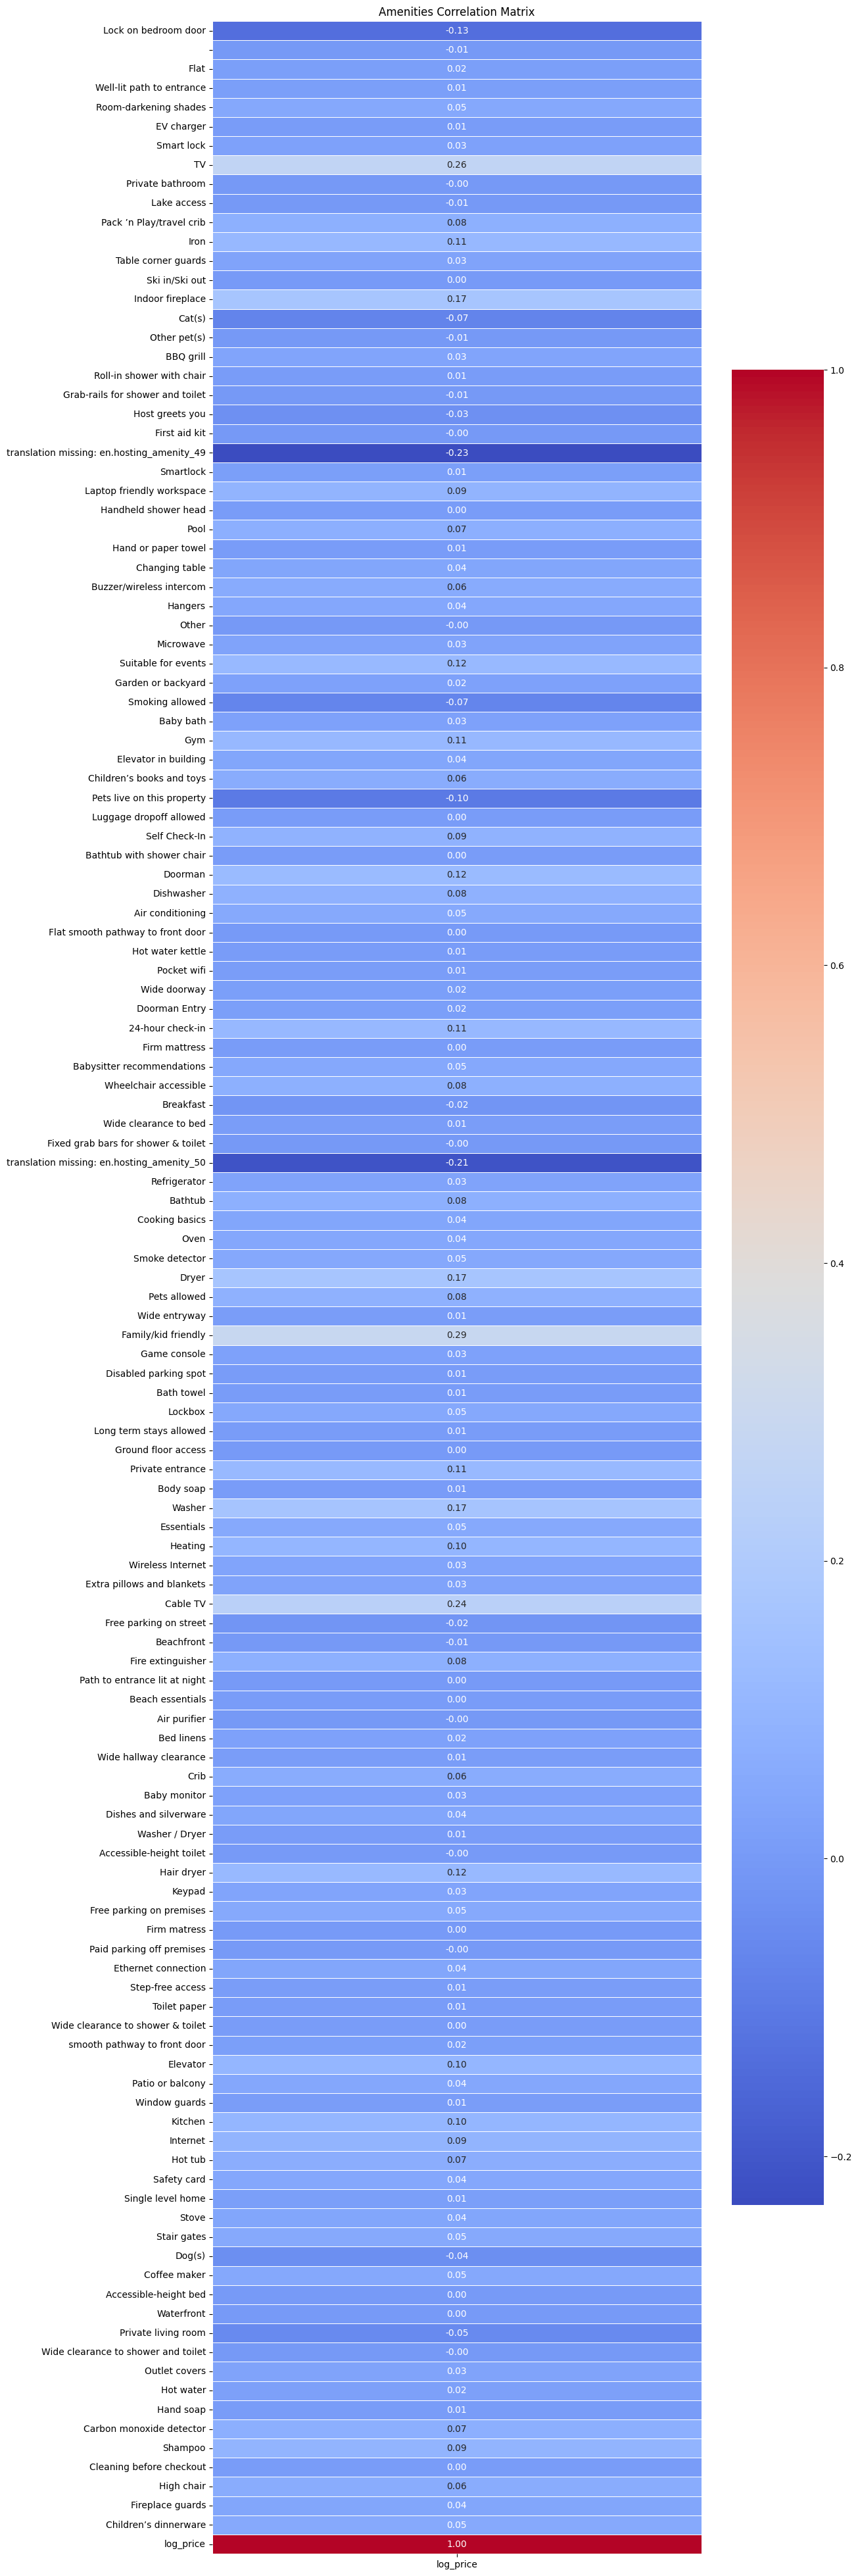

In [ ]:
# visualising correlation of amenities with price
# amenities_correlation_matrix = oh_df.corr()
plt.figure(figsize=(12, 80))
sns.heatmap(amenities_correlation_matrix[['log_price']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Amenities Correlation Matrix')
plt.show()

# Task 6

In [ ]:
#get one-hot encoded df for categorical variables
encoded_df = pd.get_dummies(df[['room_type',
                                'city',
                                'property_type',
                                'bed_type',
                                'cancellation_policy',
                                ]], columns=['room_type',
                                             'city',
                                             'property_type',
                                             'bed_type',
                                             'cancellation_policy',
                                             ],dtype=int)

encoded_df.head()

room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                          1                       0                      0   
1                          1                       0                      0   
2                          1                       0                      0   
3                          1                       0                      0   
4                          1                       0                      0   

   city_Boston  city_Chicago  city_DC  city_LA  city_NYC  city_SF  \
0            0             0        0        0         1        0   
1            0             0        0        0         1        0   
2            0             0        0        0         1        0   
3            0             0        0        0         0        1   
4            0             0        1        0         0        0   

   property_type_Apartment  property_type_Bed & Breakfast  property_type_Boat  \
0                        1                              0                   0   
1                        1                              0                   0   
2                        1                              0                   0   
3                        0                              0                   0   
4                        1                              0                   0   

   property_type_Boutique hotel  property_type_Bungalow  property_type_Cabin  \
0                             0                       0                    0   
1                             0                       0                    0   
2                             0                       0                    0   
3                             0                       0                    0   
4                             0                       0                    0   

   property_type_Camper/RV  property_type_Casa particular  \
0                        0                              0   
1                        0                              0   
2                        0                              0   
3                        0                              0   
4                        0                              0   

   property_type_Castle  property_type_Cave  property_type_Chalet  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   property_type_Condominium  property_type_Dorm  property_type_Earth House  \
0                          0                   0                          0   
1                          0                   0                          0   
2                          0                   0                          0   
3                          0                   0                          0   
4                          0                   0                          0   

   property_type_Guest suite  property_type_Guesthouse  property_type_Hostel  \
0                          0                         0                     0   
1                          0                         0                     0   
2                          0                         0                     0   
3                          0                         0                     0   
4                          0                         0                     0   

   property_type_House  property_type_Hut  property_type_In-law  \
0                    0                  0                     0   
1                    0                  0                     0   
2                    0                  0                     0   
3                    1                  0                     0   
4                    0                  0                     0   

   p

In [ ]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'distance_to_center', 'neg_score', 'neu_score', 'pos_score',
       'sentiment_score', 'Host_Tenure', 'Days_Since_Last_Review',
       'Amenities_new', 'Amenities_Count'],
      dtype='object')

In [22]:
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  \
0  Real Bed              strict          True  NYC   
1  Real Bed              strict          True  NYC   
2  Real Bed            moderate          True  NYC   
3  Real Bed            flexible          True   SF   
4  Real Bed            moderate          True   DC   

                                         description first_review  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...    6/18/2016   
1  Enjoy travelling during your stay in Manhattan...     8/5/2017   
2  The Oasis comes complete with a full backyard ...    4/30/2017   
3  This light-filled home-away-from-home is super...          NaN   
4  Cool, cozy, and comfortable studio located in ...    5/12/2015   

  host_has_profile_pic host_identity_verified host_response_rate host_since  \
0                    t                      t                NaN 2012-03-26   
1                    t                      f               100% 2017-06-19   
2                    t                      t               100% 2016-10-25   
3                    t                      t                NaN 2015-04-19   
4                    t                      t               100% 2015-03-01   

  instant_bookable last_review   latitude   longitude  \
0                f  2016-07-18  40.696524  -73.991617   
1                t  2017-09-23  40.766115  -73.989040   
2                t  2017-09-14  40.808110  -73.943756   
3                f         NaT  37.772004 -122.431619   
4                t  2017-01-22  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

   number_of_reviews  review_scores_rating  \
0                  2                 100.0   
1                  6                  93.0   
2                 10                  92.0   
3                  0                   NaN   
4                  4                  40.0   

                                       thumbnail_url zipcode  bedrooms  beds  \
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201       1.0   1.0   
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019       3.0   3.0   
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027       1.0   3.0   
3  https://a0.muscache.com/im/pictures/72208dad-9...   94117       2.0   2.0   
4                                                NaN   20009       0.0   1.0   

   Host_Tenure  Days_Since_Last_Review  \
0    12.117808                  2848.0   
1     6.882192                  2416.0   
2     7.531507                  2425.0   
3     9.052055                     NaN   
4     9.186301                  2660.0   

                                       Amenities_new  Amenities_Count  
0  [Wireless Internet, Air conditioning, Kitchen,...                9  
1  [Wireless Internet, Air conditioning, Kitchen,...               15  
2  

In [ ]:
column_names = ['accommodates','bathrooms','cleaning_fee','host_response_rate', 'instant_bookable',
                'number_of_reviews','review_scores_rating', 'bedrooms', 'beds','Host_Tenure',
                'Days_Since_Last_Review','Amenities_Count','neg_score','neu_score','pos_score',
                'sentiment_score','distance_to_center']

df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

#columns with f and t replaced with binary values
df[column_names] = df[column_names].replace({'f': 0.0, 't': 1.0})

#columns with boolean replace with floating binary
df[column_names] = df[column_names].replace({'False': 0.0, 'True': 1.0})

#fill NAN values with 0
#might replace with -1 instead for some columns
df[column_names] = df[column_names].fillna(0)

In [ ]:
#merging the one hot encode with the original df
df_merged = pd.merge(df[column_names], oh_df, left_index=True, right_index=True)

#now merging it with the other df
final_df = pd.merge(df_merged, encoded_df, left_index=True, right_index=True)
final_df

accommodates  bathrooms  cleaning_fee  host_response_rate  \
0                 3        1.0          True                 0.0   
1                 7        1.0          True               100.0   
2                 5        1.0          True               100.0   
3                 4        1.0          True                 0.0   
4                 2        1.0          True               100.0   
...             ...        ...           ...                 ...   
74106             1        1.0         False                 0.0   
74107             4        2.0          True               100.0   
74108             5        1.0          True               100.0   
74109             2        1.0          True               100.0   
74110             4        1.0         False               100.0   

       instant_bookable  number_of_reviews  review_scores_rating  bedrooms  \
0                   0.0                  2                 100.0       1.0   
1                   1.0                  6                  93.0       3.0   
2                   1.0                 10                  92.0       1.0   
3                   0.0                  0                   0.0       2.0   
4                   1.0                  4                  40.0       0.0   
...                 ...                ...                   ...       ...   
74106               0.0                  0                   0.0       1.0   
74107               0.0                 16                  93.0       2.0   
74108               1.0                 43                  94.0       2.0   
74109               1.0                  0                   0.0       0.0   
74110               0.0                205                  96.0       1.0   

       beds  Host_Tenure  Days_Since_Last_Review  Amenities_Count  neg_score  \
0       1.0    12.117808                  2848.0                9      0.048   
1       3.0     6.882192                  2416.0               15      0.013   
2       3.0     7.531507                  2425.0               19      0.060   
3       2.0     9.052055                     0.0               15      0.088   
4       1.0     9.186301                  2660.0               12      0.000   
...     ...          ...                     ...              ...        ...   
74106   1.0    11.123288                     0.0                1      0.000   
74107   4.0     8.010959                  2577.0               16      0.041   
74108   2.0    12.339726                  2429.0               31      0.000   
74109   2.0     6.635616                     0.0               15      0.000   
74110   2.0    11.446575                  2562.0               18      0.000   

       neu_score  pos_score  sentiment_score  distance_to_center     \
0          0.684      0.268         0.716667            2.178427  0   
1          0.823      0.164         0.250000            6.098183  0   
2          0.819      0.120         0.274085           11.823752  0   
3          0.734      0.178         0.281515            2.759909  0   
4          0.869      0.131         0.196795            2.898058  0   
...          ...        ...              ...                 ... ..   
74106      1.000      0.000         0.600000            5.628781  1   
74107      0.788      0.171         0.174256           28.145470  0   
74108      0.952      0.048         0.229167            5.404704  0   
74109      0.896      0.104         0.320370            2.903622  0   
74110      0.921      0.079         0.140986           45.026532  0   

       Smoke detector  Cable TV  Fixed grab bars for shower & toilet  \
0                   0         0                                    0   
1                   1         0                                    0   
2                   1         1                                    0   
3                   1         1                                    0   
4                   1         0                                    0   
...    

In [ ]:
final_df.to_csv("Final_df.csv")

# Task 7

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import cupy as cp

#load the preprocessed dataset
df = pd.read_csv("/content/drive/MyDrive/Final_df.csv",index_col=0)

In [ ]:
#split the dataset into features X and target y
X = df.drop(columns=['log_price'])
y = df['log_price']

#train and test set split 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Baseline Model: Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_r2 = r2_score(y_test, baseline_predictions)
print("Baseline Linear Regression Model:")
print("Mean Squared Error:", baseline_mse)
print("R-squared:", baseline_r2)

Baseline Linear Regression Model:
Mean Squared Error: 0.19992322903442292
R-squared: 0.6134658584445417


In [ ]:
#Nvidia rapids setup code

# This get the RAPIDS-Colab install files and test check your GPU.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 476 (delta 141), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (476/476), 131.59 KiB | 1.06 MiB/s, done.
Resolving deltas: 100% (243/243), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 951.5 kB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.4.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.3/473.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 61

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from cuml.ensemble import RandomForestRegressor as cuRandomForestRegressor
from cuml.metrics import mean_squared_error as cuml_mean_squared_error
import cupy as cp
import xgboost as xgb

In [ ]:
#using cupy for gpu accelerated training
X_train_gpu = cp.array(X_train_scaled)
X_test_gpu = cp.array(X_test_scaled)
y_train_gpu = cp.array(y_train)

In [ ]:
#intialise Random Forest model
rf_gpu = cuRandomForestRegressor()

#train the model
rf_gpu.fit(X_train_gpu, y_train_gpu)

#predict on test set
rf_gpu_preds = rf_gpu.predict(X_test_gpu)

#calculate MSE
rf_gpu_mse = cuml_mean_squared_error(cp.asnumpy(y_test), cp.asnumpy(rf_gpu_preds))

print("Random Forest (GPU) Mean Squared Error:", rf_gpu_mse)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Random Forest (GPU) Mean Squared Error: 0.17218664554137858


Random Forest - Chosen for its ability to capture non-linear relationships and interactions between features effectively, making it suitable for modeling the relationship between features and the price.

In [ ]:
#intialise extreme Gradient boosting model
xgb_gpu = xgb.XGBRegressor(device='cuda')

#train model
xgb_gpu.fit(X_train_gpu, y_train_gpu)

#generate predictions
xgb_gpu_preds = xgb_gpu.predict(X_test_gpu)

#calculate MSE
xgb_gpu_mse = cuml_mean_squared_error(cp.asnumpy(y_test), cp.asnumpy(xgb_gpu_preds))
print("Xtreme Gradient Boosting (GPU) Mean Squared Error:", xgb_gpu_mse)

Gradient Boosting (GPU) Mean Squared Error: 0.20548379746812423


Extreme Gradient Boosting - XGBoost is selected for its strong predictive power and capability to handle complex datasets. By boosting weak learners sequentially, XGBoost can effectively capture non-linear relationships and interactions, enhancing the accuracy of predictions for log_price.

# Task 8

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from cuml.ensemble import RandomForestRegressor as cuRandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#hyper parameter grids for both models
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [16, 32],
    'min_samples_split': [2, 10]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [16, 32]
}

rf_regressor = cuRandomForestRegressor()
xgb_regressor = xgb.XGBRegressor(device='cuda')

#using sklearns grid search along with k fold (k=5) for cross-validation
rf_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=rf_param_grid, cv=KFold(n_splits=5), scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train_scaled, y_train)

#getting best model and parameters
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_

#predicting with best model and parameters
best_rf_preds = best_rf_model.predict(X_test_scaled)
best_rf_mse = mean_squared_error(y_test, best_rf_preds)

print("Best Random Forest Model Mean Squared Error:", best_rf_mse)
print("Best Random Forest Model Parameters:", best_rf_params)


xgb_grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=xgb_param_grid, cv=KFold(n_splits=5), scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train_scaled, y_train)

#getting best model and parameters
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_params = xgb_grid_search.best_params_

#predicting with best model and parameters
best_xgb_preds = best_xgb_model.predict(X_test_scaled)
best_xgb_mse = mean_squared_error(y_test, best_xgb_preds)

print("Best XGBoost Model Mean Squared Error:", best_xgb_mse)
print("Best XGBoost Model Parameters:", best_xgb_params)


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/

Best Random Forest Model Mean Squared Error: 0.16866902012193902
Best Random Forest Model Parameters: {'max_depth': 32, 'min_samples_split': 2, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:02:12] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Best XGBoost Model Mean Squared Error: 0.17363979004610416
Best XGBoost Model Parameters: {'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 200}


# Task 9

In [ ]:
#initialising model with best found parameters
rf_gpu = cuRandomForestRegressor(
    max_depth=32,
    min_samples_split=16,
    n_estimators=200,
)
xgb_gpu = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=16,
    n_estimators=200,
    device='cuda'
)

rf_gpu.fit(X_train_gpu, y_train_gpu)
rf_gpu_preds = rf_gpu.predict(X_test_gpu)
rf_gpu_mse = cuml_mean_squared_error(cp.asnumpy(y_test), cp.asnumpy(rf_gpu_preds))
print("Random Forest (GPU) Mean Squared Error:", rf_gpu_mse)

xgb_gpu.fit(X_train_gpu, y_train_gpu)
xgb_gpu_preds = xgb_gpu.predict(X_test_gpu)
xgb_gpu_mse = cuml_mean_squared_error(cp.asnumpy(y_test), cp.asnumpy(xgb_gpu_preds))
print("Xtreme Gradient Boosting (GPU) Mean Squared Error:", xgb_gpu_mse)

Random Forest (GPU) Mean Squared Error: 0.16943612691218154
Xtreme Gradient Boosting (GPU) Mean Squared Error: 0.17423391465494611


In [ ]:
import pickle

#saving models
with open('/content/drive/MyDrive/rf.pkl', 'rb') as file:
    rf = pickle.load(file)

with open('/content/drive/MyDrive/XGB.pkl', 'rb') as file:
    xgb_gpu = pickle.load(file)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.8 MB/s eta 0:00:00


In [ ]:
from cuml.explainer import KernelExplainer

#using rapids shap implementation
rf_explainer = KernelExplainer(
    model=rf.predict,
    data=X_test_scaled[:500], #limited to 500 due to memory and time constraints
    is_gpu_model=True,
    nsamples=2048, #minimum nsamples
    output_type="cupy",
    random_state=42)

rf_shape_values = rf_explainer.shap_values(X_test_scaled[:500])

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either

In [ ]:
for i,column in enumerate(X.columns):
    print(i,column)

0 accommodates
1 bathrooms
2 cleaning_fee
3 host_response_rate
4 instant_bookable
5 number_of_reviews
6 review_scores_rating
7 bedrooms
8 beds
9 Host_Tenure
10 Days_Since_Last_Review
11 Amenities_Count
12 neg_score
13 neu_score
14 pos_score
15 sentiment_score
16 distance_to_center
17 Unnamed: 18
18 Smoke detector
19 Cable TV
20 Fixed grab bars for shower & toilet
21 Laptop friendly workspace
22 Wide hallway clearance
23 Self Check-In
24 24-hour check-in
25 High chair
26 Luggage dropoff allowed
27 Dog(s)
28 Suitable for events
29 Single level home
30 First aid kit
31 TV
32 Extra pillows and blankets
33 Window guards
34 Other pet(s)
35 Beach essentials
36 Hair dryer
37 Wide doorway
38 Wireless Internet
39 Washer / Dryer
40 Accessible-height toilet
41 Safety card
42 Free parking on street
43 Indoor fireplace
44 Wide entryway
45 BBQ grill
46 Hand or paper towel
47 Ground floor access
48 Iron
49 Smoking allowed
50 Bed linens
51 Essentials
52 Crib
53 Air conditioning
54 Firm mattress
55 Pets

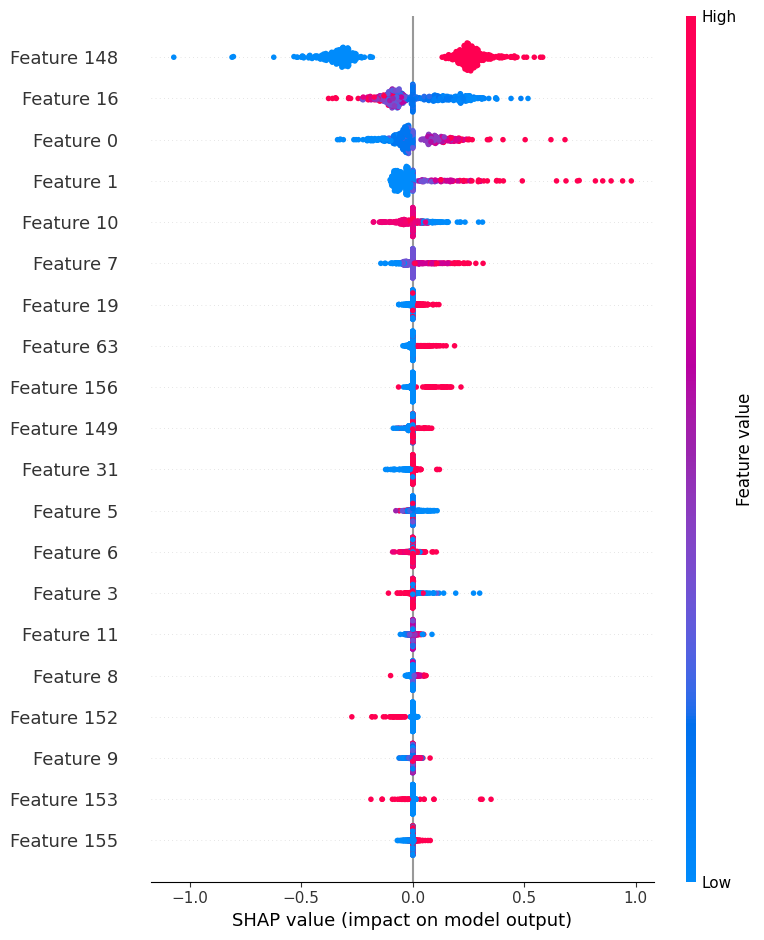

In [ ]:
import shap
shap.summary_plot(rf_shape_values.get(),X_test_scaled[:500])

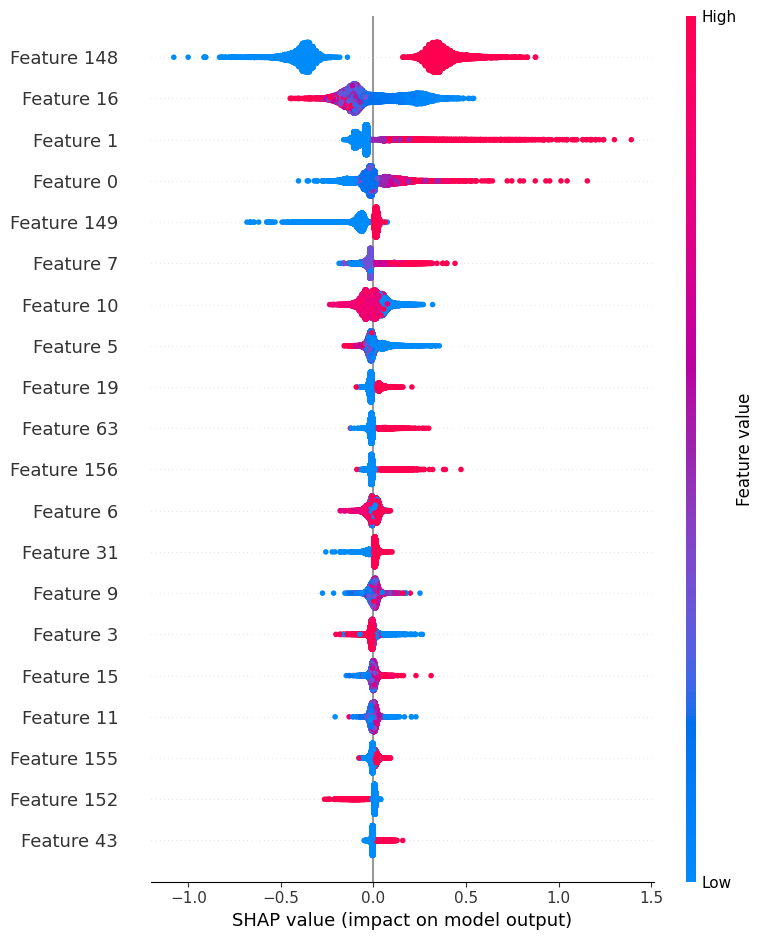

In [ ]:
import shap
xgb_explainer = shap.Explainer(xgb_gpu)
xgb_shap_values = xgb_explainer(X_test_scaled)
shap.summary_plot(xgb_shap_values, X_test_scaled)

<b>Top Features for random forest</b>
* 148 - room type: home/apartment
* 16 - distance to center
* 0 - accomodates
* 1 - bathrooms
* 10 - days since last review
* 7 - bedrooms

<b>Top Features for gradient boosting</b>
* 148 - room type: home/apartment
* 16 - distance to center
* 1 - bathrooms
* 0 - accomodates
* 149 - room type: private room
* 7 - bedrooms
* 10 - days since last review
* 5 - number of reviews

# Task 10


In [ ]:
rf_preds = rf.predict(X_test_scaled)
xgb_preds = xgb_gpu.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:00:07] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


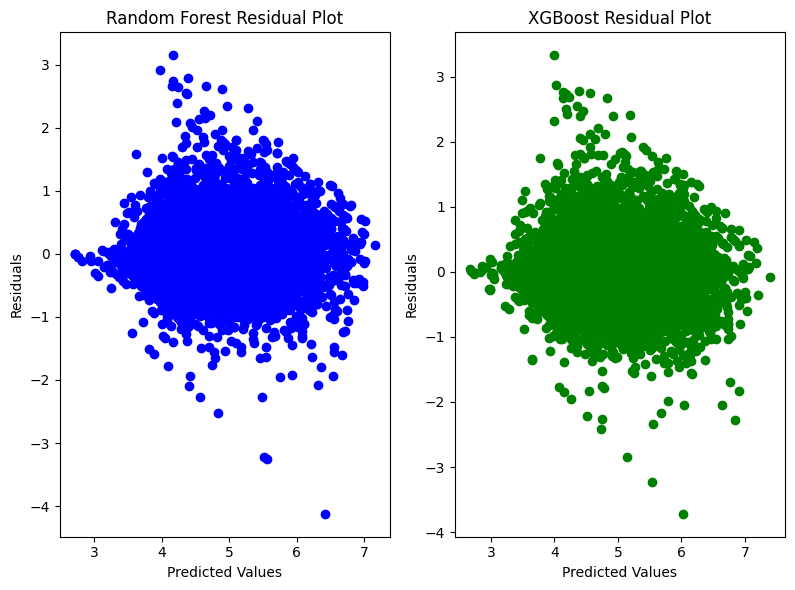

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Calculate residuals
rf_residuals = y_test - rf_preds
xgb_residuals = y_test - xgb_preds

# Residual plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(rf_preds, rf_residuals, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest Residual Plot')

plt.subplot(1, 3, 2)
plt.scatter(xgb_preds, xgb_residuals, color='green')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('XGBoost Residual Plot')

plt.tight_layout()
plt.show()

* The residuals follow a normal distribution. A normal distribution can be visually assessed by the shape of the scatter in the plot. It should resemble a bell curve, with most points concentrated near the center (zero) and fewer points further away.

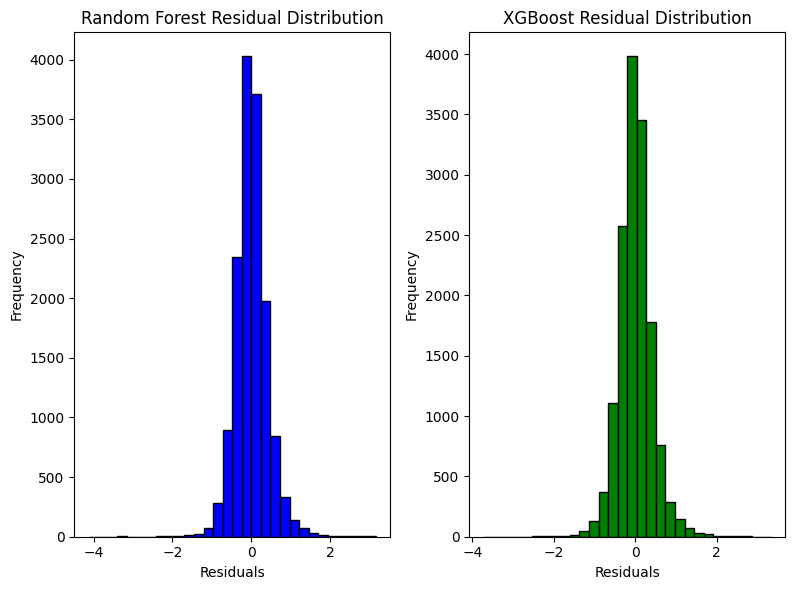

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(rf_residuals, bins=30, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest Residual Distribution')

plt.subplot(1, 3, 2)
plt.hist(xgb_residuals, bins=30, color='green', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('XGBoost Residual Distribution')

plt.tight_layout()
plt.show()

* High Density near Zero: A good model will have a high density of points close to the zero line, indicating that most predictions are accurate.
* Symmetry around Zero: The distribution of residuals should be roughly symmetrical around the zero line. This means there shouldn't be a consistent bias towards positive or negative errors.

Overall there doesn't seem to be any model biases or misfit.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

print("Random Forest Model:")
print("RMSE:", rf_rmse)
print("R-squared:", rf_r2)
print()
print("XGBoost Model:")
print("RMSE:", xgb_rmse)
print("R-squared:", xgb_r2)
print()

Random Forest Model:
RMSE: 0.41162619803916944
R-squared: 0.6724100136797753

XGBoost Model:
RMSE: 0.41741336185482386
R-squared: 0.663133909169701

